In [1]:
import pandas as pd
import scanpy as sc
import anndata as ad
import seaborn as sns
import numpy as np

In [111]:
df1=pd.read_csv("../Data_folder/TMA1/datamerge_cell_seg_data.txt", sep="\t")

In [112]:
df1 = df1.loc[df1['Tissue Category']!= 'Blank']


In [114]:
df2 =pd.read_csv("../Data_folder/TMA2/merge_cell_seg_data.txt", sep="\t")

In [115]:
df2 = df2.loc[df2["Phenotype-CD11c"]!="nan",:] # the reference cells have no phenotypes, noted as "nan". Drop those cells
df2.rename(columns={"Annotation ID": "Annotation2"},inplace=True)  # used to merge files

In [7]:
df2density = pd.read_csv("../Data_folder/TMA2/densities_tma2.csv", sep=",")

In [8]:
dfmap = pd.read_csv("../Data_folder/mapping.csv")

In [12]:
df1_map = pd.merge(df1, dfmap, how="left", on="Annotation ID")

In [13]:
df2_density = pd.merge(df2, df2density, how="left", on="Annotation2")

In [15]:
df2_map = pd.merge(df2, dfmap, how="left", on="Annotation2")

In [16]:
phenotypestr = df1.iloc[:, 3].str.replace("other", "")+df1.iloc[:, 4].str.replace("other", "")+df1.iloc[:, 5].str.replace("other", "")+df1.iloc[:, 6].str.replace("other", "")+df1.iloc[:, 7].str.replace("other", "")+df1.iloc[:, 8].str.replace("other", "")
phenotypestr.value_counts()[1:30]

CK+                   189986
CD8+                  143984
CK+CD20+               40051
CD68+                  36449
CK+CD8+                26550
CD4+                   25176
CD68+CD8+              16620
CD4+CD68+              14709
CD68+CK+               11639
CD4+CK+                 8573
CK+CD20+CD8+            7963
CD4+CK+CD20+            7555
CD4+CD8+                4317
CD68+CK+CD8+            3400
CD68+CK+CD20+           2728
CD4+FOXP3+              2252
FOXP3+CK+               2168
CD4+CD68+CD8+           2143
CD4+CD68+CK+            2043
CD68+CK+CD20+CD8+       2028
FOXP3+CD8+              1433
CD4+CD68+CK+CD20+       1132
CD4+CK+CD20+CD8+        1049
CD4+CK+CD8+             1026
CD4+FOXP3+CK+CD20+      1021
CD4+CD68+FOXP3+          854
CD4+FOXP3+CK+            714
FOXP3+CK+CD8+            621
CD4+CD68+CK+CD8+         361
dtype: int64

In [17]:
phenotypestr.value_counts()[1:30]/len(phenotypestr)

CK+                   0.243046
CD8+                  0.184196
CK+CD20+              0.051236
CD68+                 0.046629
CK+CD8+               0.033965
CD4+                  0.032207
CD68+CD8+             0.021262
CD4+CD68+             0.018817
CD68+CK+              0.014890
CD4+CK+               0.010967
CK+CD20+CD8+          0.010187
CD4+CK+CD20+          0.009665
CD4+CD8+              0.005523
CD68+CK+CD8+          0.004350
CD68+CK+CD20+         0.003490
CD4+FOXP3+            0.002881
FOXP3+CK+             0.002773
CD4+CD68+CD8+         0.002741
CD4+CD68+CK+          0.002614
CD68+CK+CD20+CD8+     0.002594
FOXP3+CD8+            0.001833
CD4+CD68+CK+CD20+     0.001448
CD4+CK+CD20+CD8+      0.001342
CD4+CK+CD8+           0.001313
CD4+FOXP3+CK+CD20+    0.001306
CD4+CD68+FOXP3+       0.001093
CD4+FOXP3+CK+         0.000913
FOXP3+CK+CD8+         0.000794
CD4+CD68+CK+CD8+      0.000462
dtype: float64

In [116]:
df1['phenotype']=df1.iloc[:, 3].str.replace("other", "")+df1.iloc[:, 4].str.replace("other", "")+df1.iloc[:, 5].str.replace("other", "")+df1.iloc[:, 6].str.replace("other", "")+df1.iloc[:, 7].str.replace("other", "")+df1.iloc[:, 8].str.replace("other", "")
df1['phenotype'].loc[(df1['phenotype']).str.replace('+', 'q').str.count("q")!=1]='other'
df1['phenotype'] = df1['phenotype'].str.replace("+","")

df1['phenotype']=df1['phenotype'].astype("category")

obs=df1[["Sample Name", "Tissue Category", "Cell ID", "Slide ID", "phenotype"]]
X=df1[["Entire Cell FOXP3 (Opal 570) Mean (Normalized Counts, Total Weighting)",
      "Entire Cell CD4 (Opal 690) Mean (Normalized Counts, Total Weighting)",
      "Entire Cell CD8 (Opal 480) Mean (Normalized Counts, Total Weighting)",
      "Entire Cell CD20 (Opal 620) Mean (Normalized Counts, Total Weighting)",
      "Entire Cell PanCK (Opal 780) Mean (Normalized Counts, Total Weighting)",
      "Entire Cell CD68 (Opal 520) Mean (Normalized Counts, Total Weighting)"]]
X.columns=["FOXP3", "CD4", "CD8", "CD20", "CK", "CD68"]


/var/folders/rd/zhvsv9zd26920xdcxclw00qs1qy3g7/T/ipykernel_19693/1005853967.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['phenotype'].loc[(df1['phenotype']).str.replace('+', 'q').str.count("q")!=1]='other'
/var/folders/rd/zhvsv9zd26920xdcxclw00qs1qy3g7/T/ipykernel_19693/1005853967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['phenotype'].loc[(df1['phenotype']).str.replace('+', 'q').str.count("q")!=1]='other'
/var/folders/rd/zhvsv9zd26920xdcxclw00qs1qy3g7/T/ipykernel_19693/1005853967.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular express

In [117]:
X1=(X-X.mean())/X.std()
X2=np.exp(X1)
X3=(X2.T/(X2.sum(axis=1))).T


In [118]:
cell_type_label_by_zscore=X3.idxmax(axis=1)
cell_type_label_by_zscore.loc[X3.max(axis=1)<0.25]="other"

In [120]:
cell_type_label_by_zscore.value_counts()/len(cell_type_label_by_zscore)

other    0.259731
CD8      0.236533
CK       0.204924
CD4      0.110181
CD68     0.088870
CD20     0.087398
FOXP3    0.012363
dtype: float64

In [121]:

obs2=df2[["Sample Name",  "Cell ID", "Slide ID"]]
Y=df2[["Entire Cell CD11c (Opal 480) Mean (Normalized Counts, Total Weighting)",
        "Entire Cell CD56 (Opal 520) Mean (Normalized Counts, Total Weighting)",
        "Entire Cell NF2 (Opal 780) Mean (Normalized Counts, Total Weighting)",
        "Entire Cell BAP1 (Opal 690) Mean (Normalized Counts, Total Weighting)",
        "Entire Cell MTAP (Opal 620) Mean (Normalized Counts, Total Weighting)",
        "Entire Cell LAG3 (Opal 570) Mean (Normalized Counts, Total Weighting)"
      ]]
Y.columns=["CD11c","CD56","NF2", "BAP1", "MTAP","LAG3"]


In [122]:
Y1=(Y-Y.mean())/Y.std()
Y2=np.exp(Y1)
Y3=(Y2.T/(Y2.sum(axis=1))).T


In [123]:
cell_type_label_by_zscore2=Y3.idxmax(axis=1)
cell_type_label_by_zscore2.loc[Y3.max(axis=1)<0.25]="other"


In [125]:
cell_type_label_by_zscore2.value_counts()/len(cell_type_label_by_zscore2)

other    0.185362
MTAP     0.173989
NF2      0.171809
CD11c    0.159819
BAP1     0.154358
CD56     0.093195
LAG3     0.061469
dtype: float64

In [126]:
df1sub = df1[["Entire Cell FOXP3 (Opal 570) Mean (Normalized Counts, Total Weighting)",
      "Entire Cell CD4 (Opal 690) Mean (Normalized Counts, Total Weighting)",
      "Entire Cell CD8 (Opal 480) Mean (Normalized Counts, Total Weighting)",
      "Entire Cell CD20 (Opal 620) Mean (Normalized Counts, Total Weighting)",
      "Entire Cell PanCK (Opal 780) Mean (Normalized Counts, Total Weighting)",
      "Entire Cell CD68 (Opal 520) Mean (Normalized Counts, Total Weighting)",
          "Phenotype-FOXP3",
          "Phenotype-CD4",
          "Phenotype-CD8",
          "Phenotype-CD20",
          "Phenotype-CK",
          "Phenotype-CD68",
          "Confidence-FOXP3",
          "Confidence-CD4",
          "Confidence-CD8",
          "Confidence-CD20",
          "Confidence-CK",
          "Confidence-CD68"]]
df1sub.columns = ["Mean-FOXP3", "Mean-CD4", "Mean-CD8", "Mean-CD20", "Mean-CK", "Mean-CD68","Pheno-FOXP3", "Pheno-CD4", "Pheno-CD8", "Pheno-CD20", "Pheno-CK", "Pheno-CD68","CF-FOXP3", "CF-CD4", "CF-CD8", "CF-CD20", "CF-CK", "CF-CD68" ]



In [127]:
df2sub = df2[["Phenotype-CD11c", 
             "Phenotype-CD56", 
             "Phenotype-BAP1",
             "Phenotype-NF2" , 
             "Phenotype-MTAP",  
             "Phenotype-LAG3",
             "Entire Cell CD11c (Opal 480) Mean (Normalized Counts, Total Weighting)",
             "Entire Cell CD56 (Opal 520) Mean (Normalized Counts, Total Weighting)",
             "Entire Cell NF2 (Opal 780) Mean (Normalized Counts, Total Weighting)",
             "Entire Cell BAP1 (Opal 690) Mean (Normalized Counts, Total Weighting)",
             "Entire Cell MTAP (Opal 620) Mean (Normalized Counts, Total Weighting)",
             "Entire Cell LAG3 (Opal 570) Mean (Normalized Counts, Total Weighting)"
            ]]
df2sub.columns = ["Pheno-CD11c", "Pheno-CD56", "Pheno-BAP1", "Pheno-NF2", "Pheno-MTAP", "Pheno-LAB3", "Mean-CD11c", "Mean-CD56", "Mean-BAP1", "Mean-NF2", "Mean-MTAP", "Mean-LAG3"]

In [128]:
#summary of the mean value of each marker
df_phenomean = df1sub[["Mean-FOXP3", "Mean-CD4", "Mean-CD8", "Mean-CD20", "Mean-CK", "Mean-CD68"]]
df_phenomean.columns= df_phenomean.columns.str.replace("Mean-","")

phenomean_summary = df_phenomean.describe()
channel_mean = phenomean_summary.loc['mean',:]
channel_25 = phenomean_summary.loc['25%',:]

phenomean_summary

,FOXP3,CD4,CD8,CD20,CK,CD68
count,781689.000000,781689.000000,781689.000000,781689.000000,781689.000000,781689.000000
mean,0.004227,0.665603,1.324602,0.198249,1.061376,0.381632
std,0.018637,1.328741,1.231700,0.562672,1.807568,1.108126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.017000,0.506000,0.002000,0.047000,0.000000
50%,0.001000,0.132000,0.982000,0.016000,0.151000,0.006000
75%,0.003000,0.637000,1.797000,0.064000,1.324000,0.151000
max,2.348000,17.180000,18.332000,7.228000,25.059000,21.382000


In [129]:
#summary of the mean value of each marker
df_phenomean2 = df2sub[["Mean-CD11c", "Mean-CD56", "Mean-BAP1", "Mean-NF2", "Mean-MTAP", "Mean-LAG3"]]
df_phenomean2.columns= df_phenomean2.columns.str.replace("Mean-","")

phenomean2_summary = df_phenomean2.describe()

phenomean2_summary

,CD11c,CD56,BAP1,NF2,MTAP,LAG3
count,857184.000000,857184.000000,857184.000000,857184.000000,857184.000000,857184.000000
mean,1.311883,0.420764,2.025101,1.962603,4.789393,0.368592
std,1.458595,0.305792,1.554414,1.287469,3.018000,0.787573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.442000,0.240000,0.861000,1.130000,2.769000,0.084000
50%,0.899000,0.370000,1.673000,1.674000,4.179000,0.176000
75%,1.656000,0.524000,2.838000,2.457000,6.066000,0.343000
max,29.961000,11.438000,18.735000,24.326000,47.967000,26.927000


In [130]:
markers = ["FOXP3", "CD4", "CD8", "CD20", "CK", "CD68"]

In [131]:
df_phenotype = df1sub.loc[:,["Pheno-FOXP3", "Pheno-CD4", "Pheno-CD8", "Pheno-CD20", "Pheno-CK", "Pheno-CD68"]].astype(str)
df_phenotype.columns= df_phenotype.columns.str.replace("Pheno-","")

df_phenotype = df_phenotype.apply(lambda x: x.str.contains("+", regex=False), axis=0)
df_phenotype[df_phenotype != True] = False
df_phenotype = df_phenotype + 0
df_phenotype = df_phenotype[markers] #sort marker
celltype_counts = df_phenotype.sum(axis=1)


1    395957
0    219968
2    128524
3     30179
4      6198
5       767
6        96
dtype: int64

In [132]:
celltype_counts.value_counts()/len(celltype_counts) #duplication percentage

1    0.506540
0    0.281401
2    0.164418
3    0.038607
4    0.007929
5    0.000981
6    0.000123
dtype: float64

In [133]:
markers2=["CD11c", "CD56"]

In [134]:
df_phenotype2 = df2sub.loc[:,["Pheno-CD11c", "Pheno-CD56"]].astype(str)
df_phenotype2.columns= df_phenotype2.columns.str.replace("Pheno-","")

df_phenotype2 = df_phenotype2.apply(lambda x: x.str.contains("+", regex=False), axis=0)
df_phenotype2[df_phenotype2 != True] = False
df_phenotype2 = df_phenotype2 + 0
celltype_counts2 = df_phenotype2.sum(axis=1)


0    785826
1     66813
2      4545
dtype: int64

In [135]:
celltype_counts2.value_counts()/len(celltype_counts2)

0    0.916753
1    0.077945
2    0.005302
dtype: float64

In [136]:

percent=pd.Series()
threshold=pd.Series()
for marker in markers:
    percent[f"{marker}"] = df_phenotype[f"{marker}"].sum() / df_phenotype.shape[0]
    threshold[marker] = df_phenomean[marker].quantile(percent.loc[marker])
# df_phenotype['CK'].sum()/len(df_phenotype['CK'])

/var/folders/rd/zhvsv9zd26920xdcxclw00qs1qy3g7/T/ipykernel_19693/2571498953.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  percent=pd.Series()
/var/folders/rd/zhvsv9zd26920xdcxclw00qs1qy3g7/T/ipykernel_19693/2571498953.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  threshold=pd.Series()


In [137]:
percent_zscore=pd.Series()
threshold_zscore=pd.Series()
for marker in markers:
    percent_zscore[f"{marker}"] = df_phenotype[f"{marker}"].sum() / df_phenotype.shape[0]
    threshold_zscore[marker] = X3[marker].quantile(percent.loc[marker])
# df_phenotype['CK'].sum()/len(df_phenotype['CK'])

/var/folders/rd/zhvsv9zd26920xdcxclw00qs1qy3g7/T/ipykernel_19693/3369523188.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  percent_zscore=pd.Series()
/var/folders/rd/zhvsv9zd26920xdcxclw00qs1qy3g7/T/ipykernel_19693/3369523188.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  threshold_zscore=pd.Series()


In [138]:
# dataframe as phonetype * mean
markers = ["FOXP3", "CD4", "CD8", "CD20", "CK", "CD68"]
df_phenotypemean = pd.DataFrame()
for marker in markers:
    df_phenotypemean[f"{marker}"] = df_phenotype[f"{marker}"] * df_phenomean[f"{marker}"]
# df_phenotypemean

In [139]:
# dataframe as phonetype * mean
df_phenotypemean2 = pd.DataFrame()
for marker in markers2:
    df_phenotypemean2[f"{marker}"] = df_phenotype2[f"{marker}"] * df_phenomean2[f"{marker}"]
# df_phenotypemean

In [140]:
df_phenotypezscore = pd.DataFrame()
for marker in markers:
    df_phenotypezscore[marker] = df_phenotype[marker] * X3[marker]

In [141]:
df_phenotypezscore2 = pd.DataFrame()
for marker in markers2:
    df_phenotypezscore2[f"{marker}"] = df_phenotype2[f"{marker}"] * Y3[["CD11c","CD56"]][marker]

In [36]:
df_CF = df1sub[["CF-FOXP3", "CF-CD4", "CF-CD8", "CF-CD20", "CF-CK", "CF-CD68"]]
df_CF = df_CF.apply(lambda x: x.str.rstrip('%').astype('float') / 100.0, axis=0)
df_CF.columns = df_CF.columns.str.replace("CF-","")

markers = ["FOXP3", "CD4", "CD8", "CD20", "CK", "CD68"]
df_phenotypeCF = pd.DataFrame()
for marker in markers:
    df_phenotypeCF[f"{marker}"] = df_phenotype[f"{marker}"] * df_CF[f"{marker}"]


#### Celltype intensity

In [142]:

phenotype_intensity = []
for idx in df_phenotypemean.index:
    if celltype_counts.loc[idx] == 0: 
        ct = "other"
    elif celltype_counts.loc[idx] == 1:

        ct = df_phenotype.loc[idx,:].idxmax()
            
    else: # 2 or more
        if df_phenotype.loc[idx, 'CK'] == 1: # if contains CK \
            
            phenotypemean_immun = df_phenotypemean.loc[idx, df_phenotypemean.columns!='CK']
            maximtype = phenotypemean_immun.idxmax()
            maxim = phenotypemean_immun.max()
            
            if maxim > threshold[maximtype]:
                ct = maximtype
            else:
                if df_phenotypemean.loc[idx,'CK'] > threshold["CK"]:
                    ct = "CK"
                else:
                    ct = "other"
          
        else:  #if not contain CK       
            maximtype = df_phenotypemean.loc[idx,:].idxmax()
            maxim = df_phenotypemean.loc[idx,:].max()
            if maxim > threshold[maximtype]:
                ct = maximtype
            else:
                ct = "other"
                
        # this is used for FOXP3 re-assignment for duplicated CD4 and FOXP3 assignment
        if ct == "CD4": #check foxp3 level
            if df_phenotypemean.loc[idx,'FOXP3'] > threshold["FOXP3"]:
                ct = "FOXP3"
            
#     # this is used for FOXP3 reassignment for all CD4 cells
#     if ct == "CD4": #check foxp3 level
#         if df_phenomean.loc[idx,'FOXP3'] > channel_mean.loc["FOXP3"]:
#             ct = "FOXP3"

    phenotype_intensity.append(ct)

In [ ]:

phenotype_intensity2 = []
for idx in df_phenotypemean.index:
    if celltype_counts.loc[idx] == 0: 
        ct = "other"
    elif celltype_counts.loc[idx] == 1:

        ct = df_phenotype.loc[idx,:].idxmax()
            
    elif celltype_counts.loc[idx] < 4: # 2 and 3
      
        phenotypemean_immun = df_phenotypemean.loc[idx, df_phenotypemean.columns!='CK']
        maximtype = phenotypemean_immun.idxmax()
        maxim = phenotypemean_immun.max()
        ct = maximtype
      
        if ct == "CD4": #check foxp3 level
            if df_phenotypemean.loc[idx,'FOXP3'] > 0:
                ct = "FOXP3"
    else:
        ct = "other"
        
    phenotype_intensity2.append(ct)

In [143]:

phenotype2_intensity = []
for idx in df_phenotypemean2.index:
    if celltype_counts2.loc[idx] == 0: 
        ct = "other"
    elif celltype_counts2.loc[idx] == 1:

        ct = df_phenotype2.loc[idx,:].idxmax()
            
    else: # 2 or more
        maximtype = df_phenotypemean2.loc[idx,:].idxmax()
        ct = maximtype
            
    phenotype2_intensity.append(ct)

In [144]:

phenotype_combined = []
for idx in df_phenotypezscore.index:
    if celltype_counts.loc[idx] == 0: 
        ct = "other"
    elif celltype_counts.loc[idx] == 1:
        ct = df_phenotype.loc[idx,:].idxmax()
            
    else: # 2 or more
        phenotypezscore_immun = df_phenotypezscore.loc[idx, (X3.columns!='CK')]
        
        maximtype = phenotypezscore_immun.idxmax()
        maxim = phenotypezscore_immun.max()
        
        ct = maximtype
        
    # this is used for FOXP3 re-assignment for duplicated CD4 and FOXP3 assignment
    if ct == "CD4": #check foxp3 level
        if df_phenotypezscore.loc[idx,'FOXP3'] > threshold_zscore['FOXP3']:
            ct = "FOXP3"
            
#     # this is used for FOXP3 reassignment for all CD4 cells
#     if ct == "CD4": #check foxp3 level
#         if df_phenomean.loc[idx,'FOXP3'] > channel_mean.loc["FOXP3"]:
#             ct = "FOXP3"

    phenotype_combined.append(ct)

In [ ]:
phenotype_combined2 = []
for idx in df_phenotypezscore.index:
    if celltype_counts.loc[idx] == 0: 
        ct = "other"
    elif celltype_counts.loc[idx] == 1:
        ct = df_phenotype.loc[idx,:].idxmax()
            
    else: # 2 or more
        phenotypezscore_immun = df_phenotypezscore.loc[idx, (X3.columns!='CK')]
        
        maximtype = phenotypezscore_immun.idxmax()
        maxim = phenotypezscore_immun.max()
        
        ct = maximtype
        
    # this is used for FOXP3 re-assignment for duplicated CD4 and FOXP3 assignment
    if ct == "CD4": #check foxp3 level
        if df_phenotypezscore.loc[idx,'FOXP3'] > 0:
            ct = "FOXP3"

    phenotype_combined2.append(ct)

In [147]:
# Panel 2 combine zscore
phenotype2_combined = []
for idx in df_phenotypezscore2.index:
    if celltype_counts2.loc[idx] == 0: 
        ct = "other"
    elif celltype_counts2.loc[idx] == 1:
        ct = df_phenotype2.loc[idx,:].idxmax()
            
    else: # 2 
        phenotypezscore2_immun = df_phenotypezscore2.loc[idx, (df_phenotypezscore2.columns!='CK')]
        
        maximtype = phenotypezscore2_immun.idxmax()
        maxim = phenotypezscore2_immun.max()
        
        ct = maximtype
        
    

    phenotype2_combined.append(ct)

In [149]:
# consider no more than 4 duplicated assignments
phenotype_CD8 = []
for idx in df_phenotypemean.index:
    if celltype_counts.loc[idx] == 0: 
        ct = "other"
    elif celltype_counts.loc[idx] == 1:
        # use origional assignment
        ct = df_phenotype.loc[idx,:].idxmax()
            
    elif celltype_counts.loc[idx] < 4 : # 2 and 3
           
        phenotypemean_immun_noCD8 = df_phenotypemean.loc[idx, (df_phenotypemean.columns!='CK') & (df_phenotypemean.columns!='CD8')]
        if phenotypemean_immun_noCD8.sum() == 0: #CK + CD8 case
            ct = "CK"
        else:
            maximtype = phenotypemean_immun_noCD8.idxmax()
            maxim = phenotypemean_immun_noCD8.max()
            ct = maximtype
                   
        # this is used for FOXP3 re-assignment for duplicated CD4 and FOXP3 assignment
        if ct == "CD4": #check foxp3 level
            if phenotypemean_immun_noCD8.loc['FOXP3'] > threshold["FOXP3"]:
                ct = "FOXP3"
            
#     # this is used for FOXP3 reassignment for all CD4 cells
#     if ct == "CD4": #check foxp3 level
#         if df_phenomean.loc[idx,'FOXP3'] > threshold["FOXP3"]:
#             ct = "FOXP3"
    else:
        ct="other"
    phenotype_CD8.append(ct)

In [152]:
pd.Series(phenotype_CD8).value_counts()/len(phenotype_CD8)

other    0.290434
CK       0.277026
CD8      0.184196
CD68     0.097846
CD4      0.074925
CD20     0.064920
FOXP3    0.010654
dtype: float64

In [154]:
df1['phenotype_intensity'] = phenotype_intensity
df1['phenotype_zscore'] = cell_type_label_by_zscore.to_list()
df1['phenotype_combined'] = phenotype_combined
df1['phenotype_CD8'] = phenotype_CD8


df1.to_csv("../Data_folder/TMA1/panel1_data_cleaned_withCelltypes_03-29.csv")


In [156]:
df1.shape

(781689, 176)

In [155]:
df2['phenotype_intensity'] = phenotype2_intensity
df2['phenotype_zscore'] = cell_type_label_by_zscore2.to_list()
df2['phenotype_combined'] = phenotype2_combined



df2.to_csv("../Data_folder/TMA2/panel2_data_cleaned_withCelltypes_03-29.csv")


In [159]:
pd.Series(phenotype_intensity).value_counts()

other    219977
CD8      193709
CK       189995
CD68      65385
CD4       58459
CD20      46189
FOXP3      7975
dtype: int64

In [160]:
pd.Series(phenotype_combined).value_counts()

other    219968
CK       189986
CD8      180893
CD68      71577
CD20      57741
CD4       53083
FOXP3      8441
dtype: int64

## Start analysis with AnnData

In [52]:
adata=ad.AnnData(X, obs)
sc.pp.scale(adata)
# adata.obs["cell_type_label_by_zscore"]=cell_type_label_by_zscore.to_list()

/var/folders/t_/j49l3nkj14xfhtf8wvpttr000000gp/T/ipykernel_955/4244898935.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=ad.AnnData(X, obs)
/Users/xim33/opt/anaconda3/envs/cell2location/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [53]:
adata.obs['phenotype1'] = phenotype1
adata.obs['phenotype_CD8'] = phenotype3
adata.obs['phenotype_david'] = phenotype_david
adata.obs["cell_type_label_by_zscore"]=cell_type_label_by_zscore.to_list()


In [54]:
sc.pp.neighbors(adata, n_neighbors=30)

/Users/xim33/opt/anaconda3/envs/cell2location/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


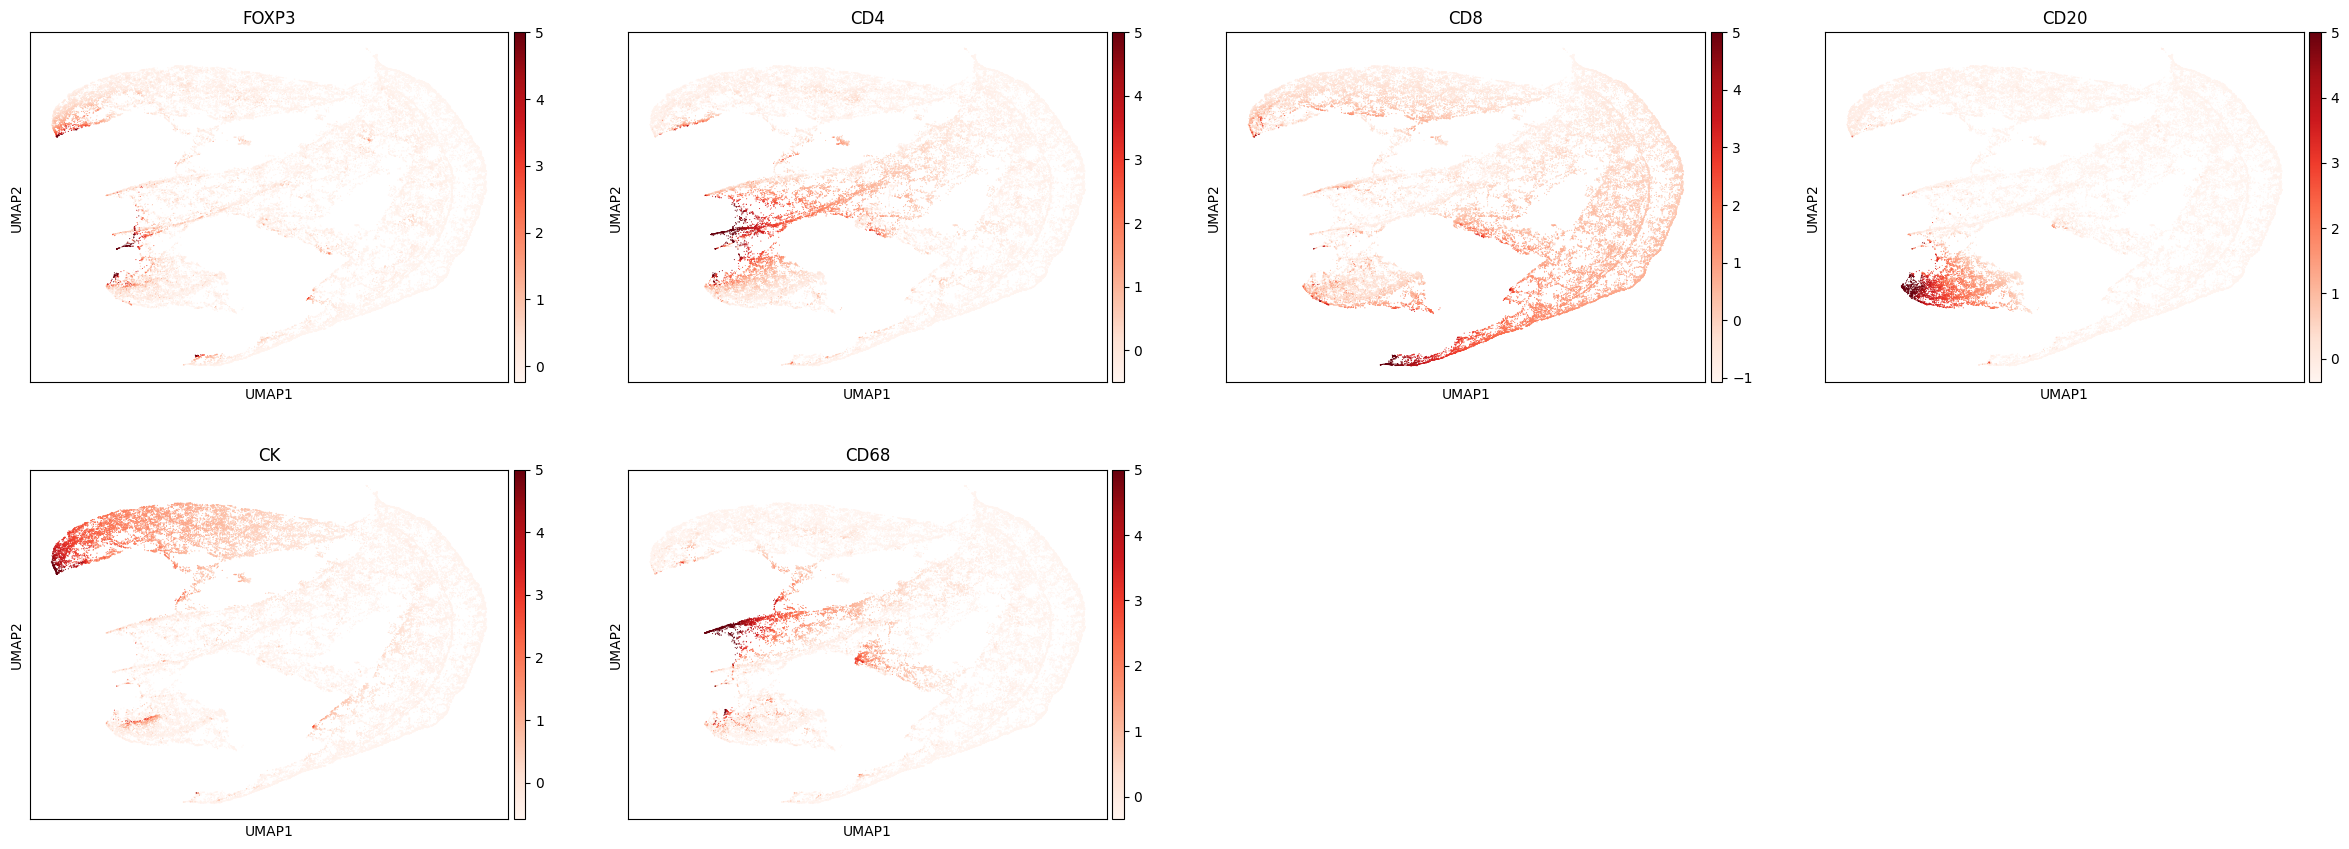

In [55]:
sc.tl.umap(adata, min_dist=0.00001)
sc.pl.umap(adata, color=adata.var_names, vmax=5, cmap='Reds')

/Users/xim33/opt/anaconda3/envs/cell2location/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/xim33/opt/anaconda3/envs/cell2location/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/xim33/opt/anaconda3/envs/cell2location/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/xim33/opt/anaconda3/envs/cell2location/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


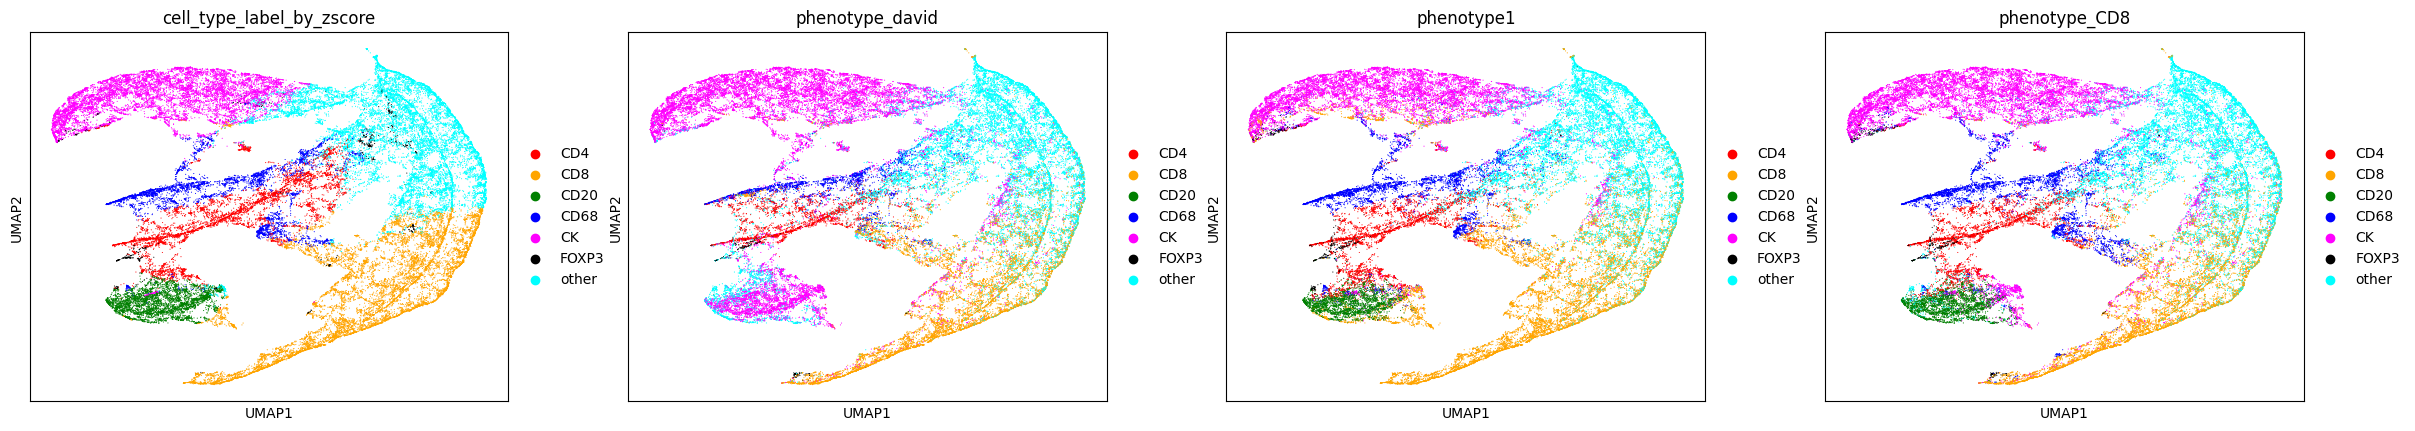

In [57]:
sc.pl.umap(adata, color=["cell_type_label_by_zscore","phenotype_david", "phenotype1", "phenotype_CD8"],palette={
        "CD4": "red",
        "CD8": "orange",
        "CD20": "green",
        "CD68": "blue",
        "CK": "magenta",
        "FOXP3": "black",
        "other": "cyan"} )

/ihome/hosmanbeyoglu/xim33/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/ihome/hosmanbeyoglu/xim33/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/ihome/hosmanbeyoglu/xim33/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


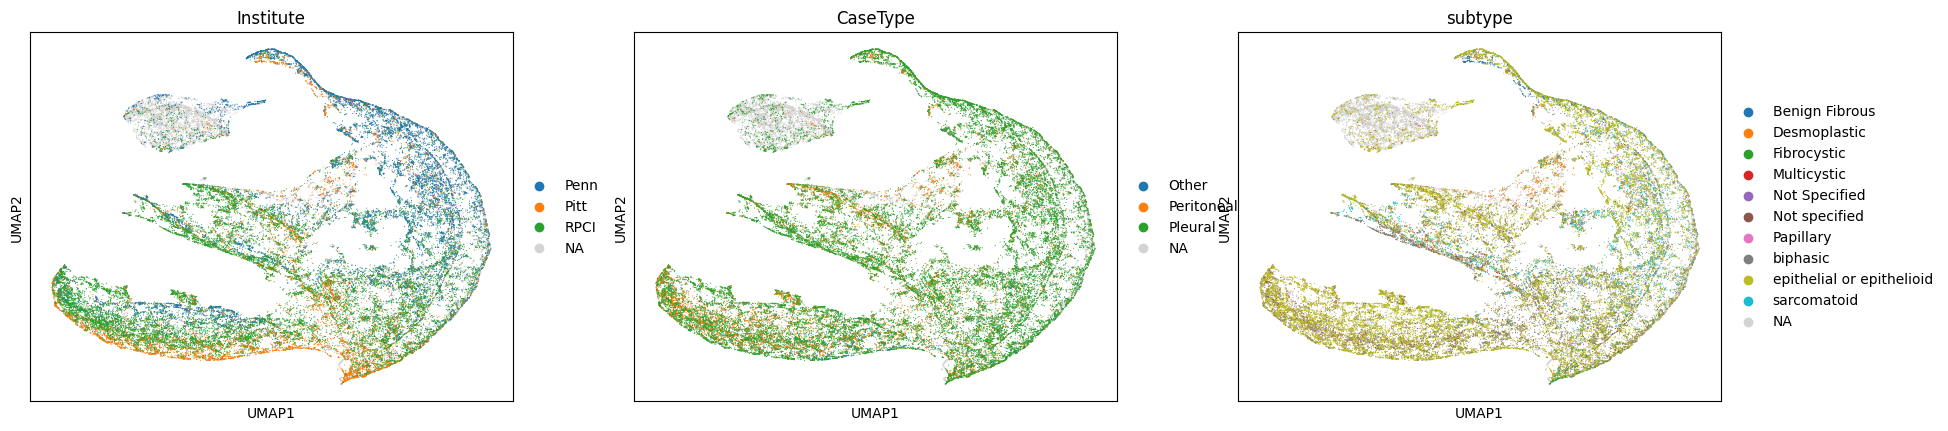

In [378]:
sc.pl.umap(adata, color=["Institute", "CaseType", "subtype"])

/ihome/hosmanbeyoglu/xim33/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


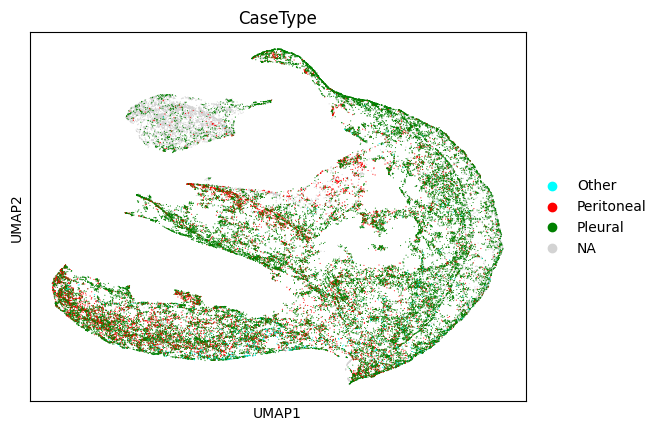

In [386]:
sc.pl.umap(adata, color=["CaseType"],palette={
        "Other": "cyan",
        "NA": "cyan",
        "Pleural": "green",
        "Peritoneal": "red",
        } )

/ihome/hosmanbeyoglu/xim33/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/ihome/hosmanbeyoglu/xim33/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/ihome/hosmanbeyoglu/xim33/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/ihome/hosmanbeyoglu/xim33/.conda/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


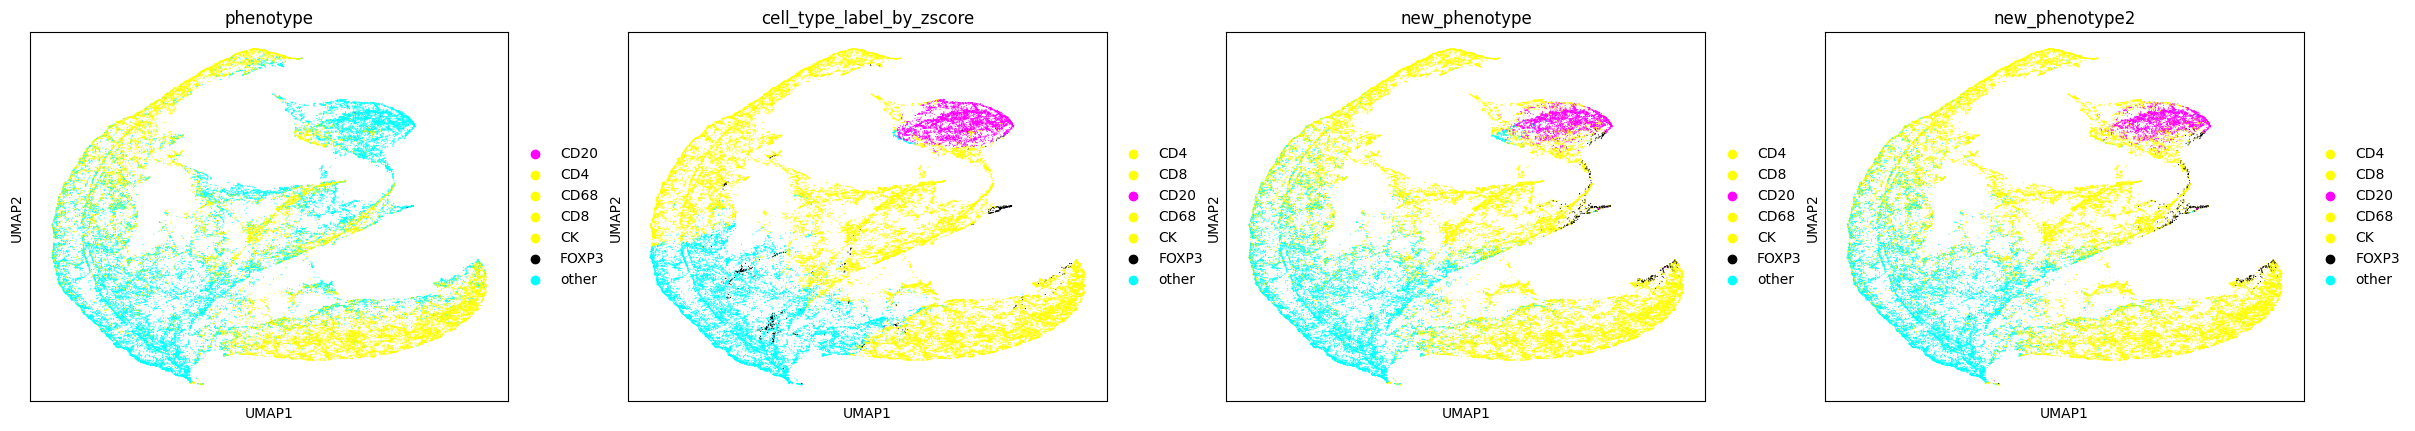

In [279]:
sc.pl.umap(adata, color=["phenotype", "cell_type_label_by_zscore", "new_phenotype", "new_phenotype2"],palette={
        "CD4": "yellow",
        "CD8": "yellow",
        "CD20": "magenta",
        "CD68": "yellow",
        "CK": "yellow",
        "FOXP3": "black",
        "other": "cyan"} ,vmax=5)

In [36]:
adata.obs[["cell_type_label_by_zscore", 'new_phenotype']].value_counts().unstack(fill_value=0)

new_phenotype,CD4,CD8,CD20,CD68,CK,FOXP3,other
cell_type_label_by_zscore,,,,,,,
CD4,3314,183,27,159,275,173,1410
CD8,2,9523,0,18,140,0,2199
CD20,318,408,2810,91,621,21,34
CD68,116,366,0,3660,64,6,324
CK,38,635,30,221,8883,128,134
FOXP3,26,126,17,28,128,187,271
other,15,906,1,66,1963,0,9935


In [81]:
adata.obs[["cell_type_label_by_zscore", 'phenotype']].value_counts().unstack(fill_value=0)

phenotype,CD20,CD4,CD68,CD8,CK,FOXP3,other
cell_type_label_by_zscore,,,,,,,
CD4,0,1596,143,129,298,0,3296
CD8,0,7,5,8103,148,0,3588
CD20,7,2,1,2,540,0,3775
CD68,0,1,2155,22,74,0,2143
CK,0,0,0,50,9037,0,1213
FOXP3,0,9,6,37,84,10,454
other,0,15,28,873,2065,0,10084


In [82]:
adata.obs[["new_phenotype", 'phenotype']].value_counts().unstack(fill_value=0)

phenotype,CD20,CD4,CD68,CD8,CK,FOXP3,other
new_phenotype,,,,,,,
CD4,0,1630,0,0,144,0,2487
CD8,0,0,0,9216,109,0,3004
CD20,7,0,0,0,14,0,2957
CD68,0,0,2338,0,6,0,1790
CK,0,0,0,0,11754,0,139
FOXP3,0,0,0,0,0,10,139
other,0,0,0,0,219,0,14037


In [93]:
phenotype.value_counts()

other    14307
CD8      12147
CD20      8076
CK        6883
CD68      4243
CD4       3829
FOXP3      515
dtype: int64